In [ ]:
# import the required libraries 

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
import sweetviz as sv

In [ ]:
# Read the csv file

In [124]:
df=pd.read_csv(r"E:\Oasis Task\Oasis Task_1\Iris.csv")

In [ ]:
# Basic informations about the columns

In [125]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
# Basic statistics of the dataset

In [127]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [229]:
corr=df.corr()
corr

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.110343,0.871754,0.817954
SepalWidthCm,-0.110343,1.000000,-0.419823,-0.355582
PetalLengthCm,0.871754,-0.419823,1.000000,0.962757
PetalWidthCm,0.817954,-0.355582,0.962757,1.000000


<AxesSubplot:>

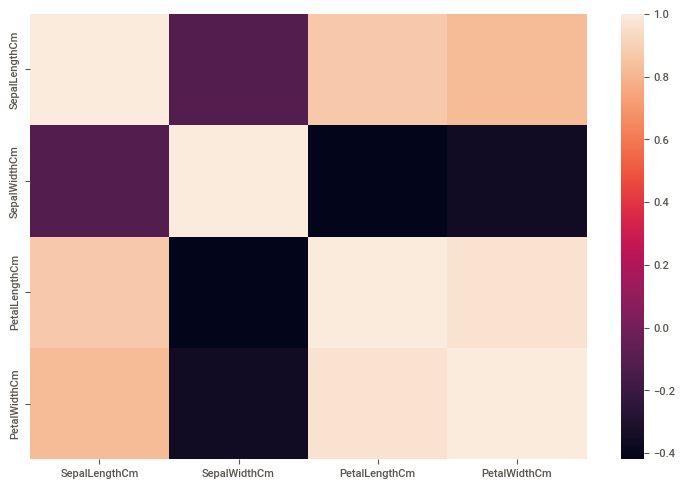

In [230]:
sns.heatmap(corr)

In [ ]:
# AutoEda Using Sweet Visualization Library

In [226]:
a=sv.analyze(df)

                                             |                                             | [  0%]   00:00 ->…

In [227]:
a.show_html(

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [ ]:
# Drop the column Id of the dataset


In [130]:
df.drop(["Id"],axis=1,inplace=True)

In [ ]:
# Null values in the dataset

In [131]:
df.isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [132]:
a=(np.where(df.columns==" "))

In [133]:
a

(array([], dtype=int64),)

In [ ]:
# Duplicate values in the data set

In [134]:
df.duplicated().sum()

3

In [ ]:
# Boxplot for detecting the Outliers in the columns 

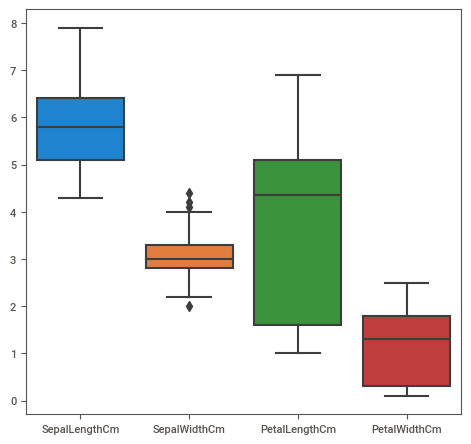

In [135]:
plt.figure(figsize=(5,5))
sns.boxplot(data=df)
plt.show()

In [ ]:
# using IQR method to replace the Outliers

In [136]:
Q3=df["SepalWidthCm"].quantile(0.75)
Q3

3.3

In [137]:
Q1=df["SepalWidthCm"].quantile(0.25)
Q1

2.8

In [138]:
IQR=Q3-Q1
IQR

0.5

In [139]:
lower_limit=Q1-(1.5*IQR)
lower_limit

2.05

In [140]:
upper_limit=Q3+(1.5*IQR)
upper_limit

4.05

In [141]:
df["df_replaced"]=pd.DataFrame(np.where(df["SepalWidthCm"]>upper_limit,upper_limit,np.where(df["SepalWidthCm"]<lower_limit,lower_limit,df["SepalWidthCm"])))


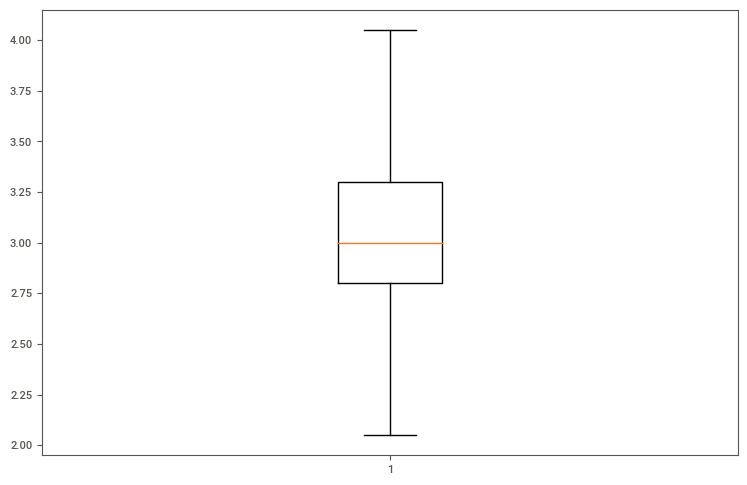

In [142]:
plt.boxplot(x=df["df_replaced"])
plt.show()

In [143]:
df.drop(["SepalWidthCm"],axis=1,inplace=True)

In [147]:
df.rename(columns={"df_replaced": "SepalWidthCm"},inplace=True)

In [148]:
df.head()

,SepalLengthCm,PetalLengthCm,PetalWidthCm,Species,SepalWidthCm
0,5.1,1.4,0.2,Iris-setosa,3.5
1,4.9,1.4,0.2,Iris-setosa,3.0
2,4.7,1.3,0.2,Iris-setosa,3.2
3,4.6,1.5,0.2,Iris-setosa,3.1
4,5.0,1.4,0.2,Iris-setosa,3.6


In [149]:
column_to_move = df.pop(df.columns[-1])

In [150]:
df.insert(1, column_to_move.name, column_to_move)

In [151]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [154]:
species_count=df["Species"].value_counts()
species_count

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [ ]:
# Count plot

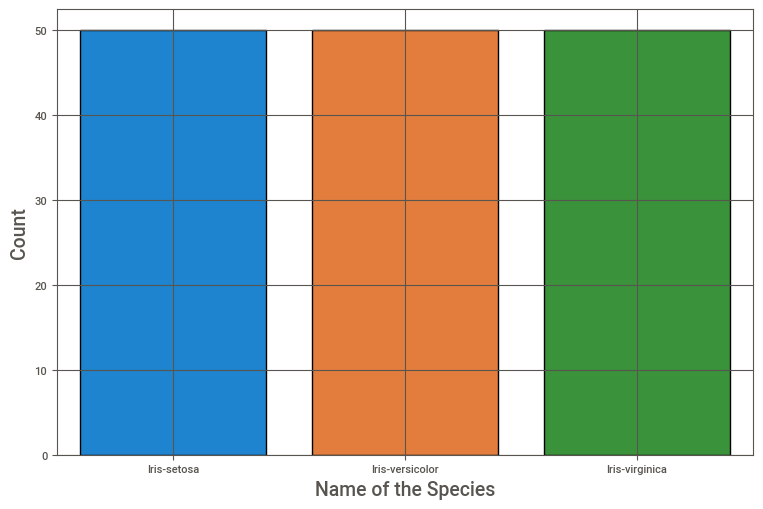

In [156]:
sns.countplot(data=df,x='Species',ec='black')
plt.xlabel("Name of the Species")
plt.ylabel("Count")
plt.grid(True)
plt.show()

In [157]:
# Splitting the data into test,train

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Make the data X and Y

In [162]:
X=df[["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]]

In [164]:
Y=df["Species"]

In [167]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20)

In [171]:
X_train.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
30,4.8,3.10,1.6,0.2
116,6.5,3.00,5.5,1.8
15,5.7,4.05,1.5,0.4
72,6.3,2.50,4.9,1.5
92,5.8,2.60,4.0,1.2


In [173]:
X_train.shape

(120, 4)

In [174]:
X_test.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
139,6.9,3.1,5.4,2.1
8,4.4,2.9,1.4,0.2
74,6.4,2.9,4.3,1.3
120,6.9,3.2,5.7,2.3
4,5.0,3.6,1.4,0.2


In [175]:
X_test.shape

(30, 4)

In [176]:
Y_train.head()

30         Iris-setosa
116     Iris-virginica
15         Iris-setosa
72     Iris-versicolor
92     Iris-versicolor
Name: Species, dtype: object

In [177]:
Y_train.shape

(120,)

In [178]:
Y_test.head()

139     Iris-virginica
8          Iris-setosa
74     Iris-versicolor
120     Iris-virginica
4          Iris-setosa
Name: Species, dtype: object

In [179]:
Y_test.shape

(30,)

In [180]:
# Standardized X with the help of StandardScaler

In [185]:
from sklearn.preprocessing import StandardScaler

In [187]:
scaler=StandardScaler()

In [188]:
X_train=scaler.fit_transform(X_train)

In [189]:
X_test=scaler.fit_transform(X_test)

In [190]:
# Creating a logestic regression model

In [192]:
from sklearn.linear_model import LogisticRegression

In [193]:
lr=LogisticRegression()

In [194]:
lr.fit(X_train,Y_train)

LogisticRegression()

In [195]:
# Prediction

In [196]:
Y_train_pred=lr.predict(X_train)

In [197]:
Y_test_pred=lr.predict(X_test)

In [198]:
# Calculating Accuracy

In [200]:
from sklearn.metrics import accuracy_score

In [202]:
print("Logistic_model Accuracy Score : ",accuracy_score(Y_train,Y_train_pred)) 

Logistic_model Accuracy Score :  0.975


In [215]:
print("Logistic_model Accuracy Score : ",accuracy_score(Y_test,Y_test_pred)) 

Logistic_model Accuracy Score :  0.9666666666666667


In [ ]:
# Creating a KNeighborsClassifier model

In [206]:
from sklearn.neighbors import KNeighborsClassifier

In [211]:
KNN=KNeighborsClassifier(3)

In [212]:
KNN.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
# Prediction

In [218]:
Y_train_KNN_pred=KNN.predict(X_train)

In [216]:
Y_test_KNN_pred=KNN.predict(X_test)

In [ ]:
# Accuracy Score

In [219]:
print("KNN Accuracy Score : ",accuracy_score(Y_train,Y_train_KNN_pred)) 

KNN Accuracy Score :  0.95


In [221]:
print("KNN Accuracy Score : ",accuracy_score(Y_test,Y_test_KNN_pred)) 

KNN Accuracy Score :  0.9333333333333333


In [224]:
df_Submit=pd.DataFrame({"Actual_Test":Y_test,"LR_Test_Pred":Y_test_pred,"KNN_Test_Pred":Y_test_KNN_pred})

In [225]:
df_Submit

,Actual_Test,LR_Test_Pred,KNN_Test_Pred
139,Iris-virginica,Iris-virginica,Iris-virginica
8,Iris-setosa,Iris-setosa,Iris-setosa
74,Iris-versicolor,Iris-versicolor,Iris-versicolor
120,Iris-virginica,Iris-virginica,Iris-virginica
4,Iris-setosa,Iris-setosa,Iris-setosa
89,Iris-versicolor,Iris-versicolor,Iris-versicolor
78,Iris-versicolor,Iris-versicolor,Iris-versicolor
108,Iris-virginica,Iris-virginica,Iris-virginica
24,Iris-setosa,Iris-setosa,Iris-setosa
70,Iris-versicolor,Iris-versicolor,Iris-virginica


In [ ]:
apna=pd.DataFrame(columns={"SepalWidhtCm":3.2,"Sepal"})